# Analisis de Datasets del TASS

In [2]:
import pandas as pd
import xml.etree.ElementTree as ET

In [3]:
# Parse XML file
def parse_xml(filename):
    tree = ET.parse(filename)
    return tree.getroot()

In [4]:
def reduce_polarity(polarities):
    if 'N' in polarities and 'P' in polarities:
        return None
    if 'NEU' in polarities and 'N' in polarities and 'P' in polarities:
        return None
    if  polarities[:-1] == polarities[1:]:
        return polarities[0]
    if 'N' in polarities and 'NEU' in polarities:
        return 'N'
    if 'P' in polarities and 'NEU' in polarities:
        return 'P'
    return polarities[0]


In [5]:
def create_dataframe(filename):
    root = parse_xml(filename)
    columns = []
    datos = []
    
    for child in root:
        if not columns:
            columns = [element.tag for element in child]
        fila = [element.text for element in child]
        datos.append(fila)

    df = pd.DataFrame(datos, columns=columns)

    return df 

In [6]:
def define_polarity(polarities):
    aux_lst =[]
    for polarity in polarities.findall('polarity'):
         if polarity.find('value') is not None:
          aux_lst.append(polarity.find('value').text)
         else:
            aux_lst(None)
    
    return reduce_polarity(aux_lst)

In [7]:
def create_sentiment_dataframe(filename):
    root = parse_xml(filename)
    tweets_data = []
    for tweet_elem in root.findall('tweet'):
        tweet_data = {}
        # Obtener elementos directos
        tweet_data['tweetid'] = tweet_elem.find('tweetid').text
        tweet_data['user'] = tweet_elem.find('user').text
        tweet_data['content'] = tweet_elem.find('content').text
        tweet_data['date'] = tweet_elem.find('date').text
        tweet_data['lang'] = tweet_elem.find('lang').text
        
        # Obtener elementos anidados sentiments
        sentiments_elem = tweet_elem.find('sentiments')
        if sentiments_elem is not None:
            tweet_data['sentiments'] =  define_polarity(sentiments_elem)
        
        else:
            tweet_data['sentiments'] = []
        
        # Obtener elementos anidados topics
        topics_elem = tweet_elem.find('topics')
        if topics_elem is not None:
            tweet_data['topics'] = [t.text for t in topics_elem.findall('topic')]
        else:
            tweet_data['topics'] = []
        
        # Agregar datos del tweet a la lista
        tweets_data.append(tweet_data)
    return pd.DataFrame(tweets_data)

## 2012

Dataset de 158 usuarios con 15 columnas de metadata:
* Columns:
    * screenname
    * id 
    * name
    * description
    * url
    * profile_image_url
    * language
    * location 
    * timezone
    * followers_count
    * friends_count
    * created_at
    * type
    * twits
    * tendency : CENTER,RIGTH,LEFT, NONE

Datase de 7219 tweets con 7 columnas de metadatos:
* Incluye topicos
* Columns : ['tweetid', 'user', 'content', 'date', 'lang', 'sentiments', 'topics']
* Label de sentimiento Negativo, Neutro, Positivo , None
* Dentro del texto existen entidades a las que se les asignan el valor

In [8]:
users_data = create_dataframe("data/2012/general-users-tagged.xml")
users_data

,screenname,id,name,description,url,profile_image_url,lang,location,timezone,followers_count,friends_count,created_at,type,twits,tendency
0,jesusmarana,268470229,Jesús Maraña,Periodista. He sido director de 'Público' (y a...,http://www.jesusmarana.com,http://a0.twimg.com/profile_images/1284036321/...,es,Madrid,Madrid,24863,360,Fri Mar 18 21:02:44 +0000 2011,periodista,838,LEFT
1,EvaORegan,44903626,Evangeline O'Regan,"Journalist based in Madrid, Spain. She current...",http://www.intereconomia.com/blog/trinchera,http://a0.twimg.com/profile_images/1166247513/...,en,Madrid,None,1706,441,Fri Jun 05 14:30:19 +0000 2009,periodista,420,UNDEFINED
2,LosadaPescador,259799108,Luis Losada Pescador,Director del Telediario de Intereconomía de la...,http://www.intereconomia.com,http://a0.twimg.com/profile_images/1768407302/...,es,España,Madrid,3833,294,Wed Mar 02 16:33:49 +0000 2011,periodista,1492,CENTRE
3,pedroj_ramirez,263780425,Pedro J. Ramirez,Twitter oficial del Director de EL MUNDO,http://www.elmundo.es,http://a0.twimg.com/profile_images/1300084651/...,es,None,Madrid,95794,182,Thu Mar 10 18:39:39 +0000 2011,periodista,2454,CENTRE
4,SSantiagosegura,105451020,Santiago Segura,cosechando amiguetismo,None,http://a0.twimg.com/profile_images/1744151202/...,en,Madrid,None,984257,261,Sat Jan 16 11:20:59 +0000 2010,famoso,1706,UNDEFINED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,GUTY14HAZ,267274202,GUTI,twiiter oficial de jose maria gutierrez hernan...,None,http://a0.twimg.com/profile_images/1894888938/...,es,MADRID,Amsterdam,457008,16,Wed Mar 16 16:44:31 +0000 2011,famoso,161,RIGHT
154,gonzalezpons,106231214,González Pons,Diputado por Valencia y Vicesecretario General...,None,http://a0.twimg.com/profile_images/2078299767/...,es,None,Greenland,30215,569,Mon Jan 18 22:32:48 +0000 2010,político,197,RIGHT
155,manuelgomeztv,270281288,Manuel Gómez,Periodista. Presentador del Telediario 2 de I...,None,http://a0.twimg.com/profile_images/1903673010/...,es,España,None,669,140,Tue Mar 22 09:58:15 +0000 2011,periodista,7,RIGHT
156,BelenHoyo,239779545,Belén Hoyo Juliá,Diputada del @GPPopular. Miembro de la Junta D...,None,http://a0.twimg.com/profile_images/1896162840/...,es,Valencia,None,1752,859,Tue Jan 18 12:10:41 +0000 2011,político,108,RIGHT


In [9]:
df = create_sentiment_dataframe("data/2012/general-train-tagged-3l.xml")
df



,tweetid,user,content,date,lang,sentiments,topics
0,142389495503925248,ccifuentes,"Salgo de #VeoTV , que día más largoooooo...",2011-12-02T00:47:55,es,NONE,[otros]
1,142389933619945473,CarmendelRiego,@PauladeLasHeras No te libraras de ayudar me/n...,2011-12-02T00:49:40,es,NEU,[otros]
2,142391947707940864,CarmendelRiego,@marodriguezb Gracias MAR,2011-12-02T00:57:40,es,P,[otros]
3,142416095012339712,mgilguerrero,"Off pensando en el regalito Sinde, la que se v...",2011-12-02T02:33:37,es,N,"[política, economía]"
4,142422495721562112,paurubio,Conozco a alguien q es adicto al drama! Ja ja ...,2011-12-02T02:59:03,es,P,[otros]
...,...,...,...,...,...,...,...
7214,189809904935120896,mariviromero,Muy indignante si ...nadie repara en ello hoy ...,2012-04-10T22:19:42,es,N,[entretenimiento]
7215,189814854503235584,mariviromero,Más pobres por discriminar a la mujer http://t...,2012-04-10T22:39:22,es,N,[otros]
7216,189815389021143041,mariviromero,Crean un banco de productos para mujeres con c...,2012-04-10T22:41:30,es,P,[tecnología]
7217,189824278827507712,Tonicanto1,Sobre la sorprendente huída hoy en el Senado d...,2012-04-10T23:16:49,es,N,[política]


In [10]:
df_topicos= df.explode('topics')

conteo_topicos = df_topicos['topics'].value_counts()

# Mostrar el resultado
print(conteo_topicos)

topics
política           3120
otros              2337
entretenimiento    1678
economía            942
música              566
fútbol              252
cine                245
tecnología          217
deportes            113
literatura          103
Name: count, dtype: int64


## 2013

Dataset de politica, 2500 tweets con 7 columnas
* Columnas: ['tweetid', 'user', 'content', 'date', 'lang', 'sentiments', 'topics']
* Label de sentimiento Negativo, Neutro, Positivo; Ninguno
* Dentro del texto existen entidades a las que se les asignan el valor de sentimiento

In [11]:
politics_df = create_sentiment_dataframe("data/2013/politics-test-tagged.xml")
politics_df

,tweetid,user,content,date,lang,sentiments,topics
0,137228516625367040,TonyKrdniosa,"""@marianorajoy: En España las cosas se pueden,...",2011-10-17T19:00:02,es,P,[política]
1,137228522019229697,elhijodelapepa,"En PSO€ el que no corre vuela, todavía calient...",2011-10-17T19:00:03,es,None,[política]
2,137228533029277696,MarisaVargas_R,#nomeolvido de q cuando se aprobo la ley del a...,2011-10-17T19:00:06,es,N,[política]
3,137228551198998528,Javier_Diego,#CCOO exige al nuevo Gobierno que reactive el ...,2011-10-17T19:00:10,es,NEU,[política]
4,137228569750405120,Alma_Cantaro,@marianorajoy A mí inviable me parecen los fra...,2011-10-17T19:00:15,es,None,[política]
...,...,...,...,...,...,...,...
2495,137523161032953856,anabusta,"#rebélate @iunida @cayo_lara ""¿Dinero a los ba...",2011-10-18T14:30:51,es,N,[política]
2496,137523199150796800,europapress_es,". @cayo_lara: ""La prima de riesgo es la niña d...",2011-10-18T14:31:00,es,N,[política]
2497,137523450393788416,CatalanGarcia1,@cayo_lara Vuestra propuesta decreación de emp...,2011-10-18T14:32:00,es,P,[política]
2498,137523567108685824,anabusta,"#rebelate @iunida cayo_lara: ""La prima de ries...",2011-10-18T14:32:28,es,N,[política]


In [12]:
politics_topics= politics_df.explode('topics')

cant_politic_topics = politics_topics['topics'].value_counts()

print(cant_politic_topics )

topics
política    2500
Name: count, dtype: int64


## 2014

Dataset de entretenimiento de 1773 filas
 * Columnas : ['id', 'texto', 'sentimiento']
 * Sentimiento: 
   - [{'aspect': 'Afición', 'polarity': 'P'},
   - {'aspect': 'Equipo-Real_Madrid', 'polarity': 'P'},
   - {'aspect': 'Equipo', 'polarity': 'P'}]

In [13]:
def crate_social_dataframe(filename):
    root = parse_xml(filename)
    df_columns = ['id', 'texto', 'sentimiento']
    data = {'id': [], 'texto': [], 'sentimiento': []}
    for tweet_elem in root.findall('tweet'):
        tweet_data = {}
        tweet_data['id'] = tweet_elem.get('id')
        
        sentimientos = []
        for sentiment_elem in tweet_elem.findall('sentiment'):
            aspect = sentiment_elem.get('aspect')
            polarity = sentiment_elem.get('polarity')
            sentimientos.append(polarity)
        tweet_data['sentimiento'] = reduce_polarity(sentimientos)
        
        
        texto_completo = ''
        for elem in tweet_elem.itertext():
            texto_completo += elem.strip()
            texto_completo += " "
        tweet_data['texto'] = texto_completo if texto_completo else None


        for col in df_columns:
            data[col].append(tweet_data[col])
    
    return pd.DataFrame(data)    

In [14]:
social_train = crate_social_dataframe("data/2014/socialtv-train-tagged.xml") 
print(social_train.head(1))

                   id                                              texto  \
0  456544889786728451  Los que esta noche van a la redonda a celebrar...   

  sentimiento  
0           P  


## 2015

Dataset de lengua española
- 7669 filas
- id texto label

In [22]:
# spa_label = pd.read_table("data/2015/spanish_sentiment.tsv")
# spa_label.rename(columns = {'text':'texto', 'label': 'sentimiento'}, inplace = True)
# sentiment_map = {'neutral': 'NEU', 'negative': 'N', 'positive': 'P'} 
# spa_label.sentimiento = spa_label.sentimiento.apply(lambda x: sentiment_map[x])
# spa_label

FileNotFoundError: [Errno 2] No such file or directory: 'data/2015/spanish_sentiment.tsv'

Dataset de politica de 784 filas
 * Columnas : ['id', 'texto', 'sentimiento']
 * Sentimiento: [{'aspect': 'Economia', 'polarity': 'N'}]

In [23]:
stompol_train = crate_social_dataframe("data/2015/stompol-train-tagged.xml")
stompol_train

,id,texto,sentimiento
0,591154373696323584,Diga cuanto nos van a costar las autovías de s...,N
1,591154532362670080,@lhermoso_ @sanchezcastejon #DobleMoral Castil...,N
2,591154730111500288,@PSOE @sanchezcastejon Me hace mucha gracia qu...,N
3,591154874131308544,Para que todo el mundo lo tengo claro .... @Cs...,NEU
4,591154909384409088,@Albert_Rivera y @CiudadanosCs saben q este pa...,N
...,...,...,...
779,591482509013028864,@cs_hor @AntSoubrieCs @Albert_Rivera @Cs_Alcob...,N
780,591483818088923137,El PP ganaría la Comunidad de Madrid y el Ayun...,NEU
781,591484734770843650,¿Quién es Pedro Sánchez ? Mi artículo de los v...,NEU
782,591485374783860736,Hoy mucha propaganda del IBEX-35 en las encues...,None


In [25]:
stompol_train.sentimiento.value_counts()

sentimiento
N      435
NEU    174
P      157
Name: count, dtype: int64

## 2019



Datasets con tweets con léxico propio de diversos paises:
 * Columnas :  ['tweetid', 'user', 'content', 'date', 'lang', 'sentiment_value']
 * Sentiment value = None, Negative, Positive

Tweets por paises: 
 
| Pais     | Train | Dev     | **Total**   |
|----------|-------|---------|-------- |
| Costa Rica | 777   | 390   | 1167    |
| España     | 1008  | 506   | 1514    |
| Uruguay    | 943   | 486   | 1429    |
| Mexico     | 989   | 510   | 1499    |
| Peru       | 966   | 498   | 1464    |
| **Total**      | **4683**  | **2390**  | **7073**    |


In [26]:
def create_inter_dataframe(filename):
    root = parse_xml(filename)
    tweets_data = []
    for tweet_elem in root.findall('tweet'):
        tweet_data = {}
        
        tweet_data['id'] = tweet_elem.find('tweetid').text
        tweet_data['texto'] = tweet_elem.find('content').text

        sentiment_elem = tweet_elem.find('sentiment')
        
        polarity_elem = sentiment_elem.find('polarity')
        
        tweet_data['sentimiento'] = polarity_elem.find('value').text if polarity_elem is not None else None
        
        tweets_data.append(tweet_data)


    return pd.DataFrame(tweets_data)

### Costa Rica

In [27]:
cr_train = create_inter_dataframe("data/2019/TASS2019_country_CR_train.xml")
cr_train

,id,texto,sentimiento
0,768225400254111744,@NoilyMV yo soy totalmente puntual,NONE
1,770077064833671168,@SandraCauffman Hola Sandrita. No le habia des...,P
2,771207534342320128,Si andan haciendo eso mejor se quedaran callad...,N
3,771900763987513345,Que pereza quiero choco banano,N
4,772550560998301697,"@robertobrenes Bueno, no es tanto lo mayor com...",N
...,...,...,...
772,814853214050906112,Quiero como tener carro para hacer todo rápido,NEU
773,815439552038977537,Tristeza más hp me da siempre en año nuevo,N
774,817864316372348928,no encuentro ninguna buena serie en NF.,N
775,817069708927266816,@Alphasniper97 Alpha suerte y ten un feliz año...,P


In [28]:
cr_dev = create_inter_dataframe("data/2019/TASS2019_country_CR_dev.xml")
cr_dev

,id,texto,sentimiento
0,769802080701648896,@DexterAOM por eso es que se dice lo del final...,NEU
1,772253053328105472,"@kikorobles11 6 meses con la banda y largo, fu...",NONE
2,775091274475003904,@bichoclarke @AndreaVasRo El otro día me quejé...,N
3,768874738089275393,El sábado se casa Adriel y eso me hace sentir ...,NEU
4,767564596177666048,@ferrg25 igual uno ya está en el baúl de los r...,NEU
...,...,...,...
385,819406610636357632,"@leonora_monge @susi_sot por mi sí, con 20 rojos",NONE
386,819337926026862593,Antojo de empanada colombiana,NEU
387,819383109334552576,@mendezcr nah! Yo estoy lleno de tattos y me a...,P
388,819366776052060161,"@Mayel_Oh Cuando te lo creés, lo sos. Pero bue...",N


### España

In [29]:
es_train = create_inter_dataframe("data/2019/intertass-ES-train-tagged.xml")
es_train

,id,texto,sentimiento
0,768213876278165504,-Me caes muy bien \n-Tienes que jugar más part...,NONE
1,768213567418036224,@myendlesshazza a. que puto mal escribo\n\nb. ...,N
2,768212591105703936,@estherct209 jajajaja la tuya y la d mucha gen...,N
3,768221670255493120,Quiero mogollón a @AlbaBenito99 pero sobretodo...,P
4,768221021300264964,Vale he visto la tia bebiendose su regla y me ...,N
...,...,...,...
1003,814846333601320960,Para mí mi mejor año fue el 2015,P
1004,813731371076243461,Hoy va a ser un dia muy largo...,N
1005,818399956792905728,11:11 que no me encuentre mal,NEU
1006,815715581878009858,Es que son muy bonitas jo,P


In [30]:
es_dev = create_inter_dataframe("data/2019/intertass-ES-development-tagged.xml")
es_dev

,id,texto,sentimiento
0,770976639173951488,@noseashetero 1000/10 de verdad a ti que voy a...,P
1,771092421866389508,@piscolabisaereo @HistoriaNG @SPosteguillo las...,P
2,771092111429083136,"Al final han sido 3h Bueno, mañana tengo fies...",P
3,771092070572449796,@Jorge_Ruiz14 yo no tengo tiempo para esas cos...,N
4,771094192508600320,@_MissChaotic_ ves ese brillo? es un coso que ...,N
...,...,...,...
501,757593585634213888,@Davorias Pero es que está muy rica,P
502,757585725764362240,@narvalillo Eso es antiguo ya,N
503,757097408304148480,Mi TL esta vacía a estas horas,N
504,757971881077182464,"Ya tengo uno, pero ese es más cheto @aweamasome.",NEU


### Perú

In [31]:
pe_train = create_inter_dataframe("data/2019/TASS2019_country_PE_train.xml")
pe_train

,id,texto,sentimiento
0,772432598027145216,"Sin ser fan de Juan Gabriel, siempre supe que ...",P
1,772489016352669701,Sabes que no tendrás un buen día cuando lo pri...,N
2,771317218634149888,"En situaciones en las que no sepas que hacer, ...",N
3,771715645843079169,ayer preguntaban y dónde están las solteras!!!...,NEU
4,771744506861461504,Que el finde sea para hacer cualquier cosa que...,NEU
...,...,...,...
961,818130147366813696,"Terminarán odiándome, como casi todos los padr...",N
962,816876533231079424,Necesito urgente entrar a la gimnasia y al gim...,NONE
963,816890935808323584,Lo que me recuerda que @edvergaray me criticar...,NONE
964,818483269255761920,"Hasta lo peor de mi, quiere lo mejor para ti",NEU


In [32]:
pe_dev = create_inter_dataframe("data/2019/TASS2019_country_PE_dev.xml")
pe_dev

,id,texto,sentimiento
0,769672659793801216,Así te paguen bien... Si es a última hora... N...,N
1,770775991090380800,Manolo: se llama H&M por Hombre y Mujer. Yo: ....,NONE
2,775046786134241280,Buen resumen de mi vida amorosa. - Lo he amado...,N
3,768889490383446016,@BartanSoo12 Pero tú ya sabes por qué le digo ...,NONE
4,768333118239412224,Viendo con mi gordiflaqui LOCA POR LAS COMPRAS...,NONE
...,...,...,...
493,819397621106221057,@JohnsitoCb Ya sabía que un chivito se iría a ...,NONE
494,819277149274275840,Hazme un favor y has lo posible por no cruzart...,NONE
495,819276021988020230,Bueeeeno... no me siento bien. Gracias playlis...,N
496,819423188580966400,D.O eres genial ...Feliz cumpleaños y q sean m...,P


### Uruguay

In [33]:
ur_train = create_inter_dataframe("data/2019/TASS2019_country_UY_train.xml")
ur_train

,id,texto,sentimiento
0,768529421548609536,Yo espero tranquila. Si gana de nvo alg partid...,NEU
1,771028255629512706,"Los fracasos de Michelle, Cristina y Dilma mue...",N
2,771055632854183940,Debemos orar por los hnos venezolanos gente q ...,N
3,770138191689093122,Me dijo que no le había gustado no se cuantas ...,NEU
4,769716104491040768,@susanagkp jajaja yo fui el viernes ! precavid...,N
...,...,...,...
938,811436261059792896,@AmorAKilates @Roocio_Mk si me pasa lo mismo!,NONE
939,809280785182322688,@clauchoarrionda pquno ladra y ls demas retwitean,NEU
940,810772298911350784,A mi desayuno le hizo falta un alfajor podrida...,N
941,813200690894045184,Viste cuando necesitas que alguien te escuche ...,N


In [34]:
ur_dev = create_inter_dataframe("data/2019/TASS2019_country_UY_dev.xml")
ur_dev

,id,texto,sentimiento
0,768113609725489152,@cuervotinelli estoy preocupado !! ... Me pon...,NEU
1,768862180104138752,hoy en musimundo van a estar filmando discos d...,N
2,767352207146713088,"@osilveira buena! ""Cría cuervos, que te comerá...",N
3,769233349651099648,@Adri_tranqui como en el caso de invitar a alg...,NEU
4,769477038021439489,No se tomen nunca el copa de las 6:15 en Mtvo ...,N
...,...,...,...
481,819404084637790208,@sonmifelicidad_ yo el programa!! sino lo veo ...,N
482,819405921000583171,@sonmifelicidad_ igual este Lunes seguro vea L...,NEU
483,819398651759955968,@Guille2SantosTM @urbandoficial Al contrario g...,P
484,819397460908974080,@juliapresa0 todas julinator te quiero y extraño,P


### México

In [35]:
mx_train = create_inter_dataframe("data/2019/TASS2019_country_MX_train.xml")
mx_train

,id,texto,sentimiento
0,767817507897872385,— ¿Nivel de inglés? — Alto. — Traduzca juguete...,NEU
1,772486813948575745,Si soy de área 4 y con suerte pase mate IV y m...,N
2,771871884451295233,Sabían que su after fav Teatro G. fue construi...,P
3,771947976302456832,Y hoy por primera vez me salí con el permiso d...,P
4,774741645484896256,"¿Para qué hacen coraje con Ambriz?, al final n...",N
...,...,...,...
984,818773396318277633,Si quieren que aprenda algo de eso dejen esa m...,NEU
985,818738784657408000,Últimos momentos en medicina familiar y de gua...,NONE
986,819050320177152000,@natyamezcua hay pues hay que ver que hacemos ...,NEU
987,819049335602216962,Me acabo de tragar un pastel en mood celina,N


In [36]:
mx_dev = create_inter_dataframe("data/2019/TASS2019_country_MX_dev.xml")
mx_dev

,id,texto,sentimiento
0,774677024673714176,Hoy le dí asesoría a 1 dude q qería recuperar ...,P
1,773710630956130304,¡Rápido a qué comprar el iPhone 7 antes que sa...,NEU
2,764625478317596672,Sólo y triste bajo el sol en la playa busco am...,NEU
3,756002242503643141,Contestarle a mi novio 2hrs y media después po...,N
4,779494837418463232,Quien se va de party hoyyy.?? Yooo..!!! Quien ...,P
...,...,...,...
505,819365162302013443,"tomando en miércoles?... na, sólo olvide mis l...",N
506,819456610829471744,quiero y necesito verte yaaaa,P
507,819456529543798784,Gracias a Comedy Central y MTV voy a estar en ...,P
508,819469945167720448,@andresg9108 y que los demas solo den npm inst...,NONE


## 2020

Dataset en español con 5886 (train) + 857 (dev) tweets con emociones:
   - anger (also includes annoyance and rage) 
   - disgust (also includes disinterest, dislike and loathing)
   - fear (also includes apprehension, anxiety, concern, and terror) 
   - joy (also includes serenity and ecstasy) 
   - sadness (also includes pensiveness and grief) 
   - surprise (also includes distraction and amazement) 
Columns: ['id', 'tweet', 'label ']
Shap

In [37]:
emotions_train = pd.read_csv("data/2020/train.tsv", sep='\t')
emotions_train


,id,tweet,label
0,1,El Atlético resignado a perder HASHTAG 😔 http...,sadness
1,2,Leer proporciona una mejor visión del mundo 🤓 ...,joy
2,3,Amo a Arya Stark por encima de todas las cosas...,joy
3,4,Gracias HASHTAG es increíble que una niña logr...,others
4,5,Solo siento que hayamos perdido 24 escaños de ...,sadness
...,...,...,...
5881,5882,Pequeños gestos que puedes hacer por el medio ...,others
5882,5883,¿Sabías que de las dos coronaciones que se cel...,surprise
5883,5884,Mientras reflexionamos sobre lo duro que es es...,anger
5884,5885,La fachada de la catedral de Notre Dame fue “s...,sadness


In [38]:
emotions_dev = pd.read_csv("data/2020/dev.tsv", sep='\t')
emotions_dev

,id,tweet,label
0,1,-Spoiler- Nadie ha tenido el dilema de tener q...,others
1,2,Yo solo quiero saber donde esta HASHTAG? HASHT...,others
2,3,"La literatura nos hace más empáticos, dispuest...",joy
3,4,"Para mi, estas son las 4 mejores escenas de es...",surprise
4,5,Lo que acabo de ver es puro oro. Historia de l...,joy
...,...,...,...
852,853,"USER ya no te duermas con lentes puestos, si n...",others
853,854,"En el HASHTAG, recordamos las mejores recomend...",others
854,855,¡Feliz HASHTAG! 📚 Esperamos que os hayan regal...,joy
855,856,Que lo mismo l@s español@s no somos imbéciles ...,others


In [39]:
# words_demo = pd.read_json("data/data")
# print(words_demo)

ValueError: Expected object or value

In [45]:
total_df = pd.concat([cr_dev,cr_train, mx_dev, mx_train, es_train,  ur_dev, ur_train, pe_dev, pe_train]) #spa_label,
total_df.reset_index(inplace=True, drop=True)
total_df

,id,texto,sentimiento
0,769802080701648896,@DexterAOM por eso es que se dice lo del final...,NEU
1,772253053328105472,"@kikorobles11 6 meses con la banda y largo, fu...",NONE
2,775091274475003904,@bichoclarke @AndreaVasRo El otro día me quejé...,N
3,768874738089275393,El sábado se casa Adriel y eso me hace sentir ...,NEU
4,767564596177666048,@ferrg25 igual uno ya está en el baúl de los r...,NEU
...,...,...,...
6562,818130147366813696,"Terminarán odiándome, como casi todos los padr...",N
6563,816876533231079424,Necesito urgente entrar a la gimnasia y al gim...,NONE
6564,816890935808323584,Lo que me recuerda que @edvergaray me criticar...,NONE
6565,818483269255761920,"Hasta lo peor de mi, quiere lo mejor para ti",NEU


In [40]:
stompol_train

,id,texto,sentimiento
0,591154373696323584,Diga cuanto nos van a costar las autovías de s...,N
1,591154532362670080,@lhermoso_ @sanchezcastejon #DobleMoral Castil...,N
2,591154730111500288,@PSOE @sanchezcastejon Me hace mucha gracia qu...,N
3,591154874131308544,Para que todo el mundo lo tengo claro .... @Cs...,NEU
4,591154909384409088,@Albert_Rivera y @CiudadanosCs saben q este pa...,N
...,...,...,...
779,591482509013028864,@cs_hor @AntSoubrieCs @Albert_Rivera @Cs_Alcob...,N
780,591483818088923137,El PP ganaría la Comunidad de Madrid y el Ayun...,NEU
781,591484734770843650,¿Quién es Pedro Sánchez ? Mi artículo de los v...,NEU
782,591485374783860736,Hoy mucha propaganda del IBEX-35 en las encues...,None


In [41]:
df_reducido = df[['tweetid', 'content', 'sentiments']]
df_reducido.rename(columns={'tweetid': 'id', 'content': 'texto', 'sentiments': 'sentimiento'}, inplace=True)


/tmp/ipykernel_6201/2331451413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reducido.rename(columns={'tweetid': 'id', 'content': 'texto', 'sentiments': 'sentimiento'}, inplace=True)


In [42]:
df_reducido

,id,texto,sentimiento
0,142389495503925248,"Salgo de #VeoTV , que día más largoooooo...",NONE
1,142389933619945473,@PauladeLasHeras No te libraras de ayudar me/n...,NEU
2,142391947707940864,@marodriguezb Gracias MAR,P
3,142416095012339712,"Off pensando en el regalito Sinde, la que se v...",N
4,142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ...,P
...,...,...,...
7214,189809904935120896,Muy indignante si ...nadie repara en ello hoy ...,N
7215,189814854503235584,Más pobres por discriminar a la mujer http://t...,N
7216,189815389021143041,Crean un banco de productos para mujeres con c...,P
7217,189824278827507712,Sobre la sorprendente huída hoy en el Senado d...,N


In [43]:
politics_df_reduced = politics_df[['tweetid', 'content', 'sentiments']]
politics_df_reduced.rename(columns={'tweetid': 'id', 'content': 'texto', 'sentiments': 'sentimiento'}, inplace=True)
politics_df_reduced

/tmp/ipykernel_6201/757200566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  politics_df_reduced.rename(columns={'tweetid': 'id', 'content': 'texto', 'sentiments': 'sentimiento'}, inplace=True)


,id,texto,sentimiento
0,137228516625367040,"""@marianorajoy: En España las cosas se pueden,...",P
1,137228522019229697,"En PSO€ el que no corre vuela, todavía calient...",None
2,137228533029277696,#nomeolvido de q cuando se aprobo la ley del a...,N
3,137228551198998528,#CCOO exige al nuevo Gobierno que reactive el ...,NEU
4,137228569750405120,@marianorajoy A mí inviable me parecen los fra...,None
...,...,...,...
2495,137523161032953856,"#rebélate @iunida @cayo_lara ""¿Dinero a los ba...",N
2496,137523199150796800,". @cayo_lara: ""La prima de riesgo es la niña d...",N
2497,137523450393788416,@cayo_lara Vuestra propuesta decreación de emp...,P
2498,137523567108685824,"#rebelate @iunida cayo_lara: ""La prima de ries...",N


In [92]:
df_integrated = pd.concat([df_reducido, stompol_train, total_df, politics_df_reduced]) #, df_reducido, stompol_train, 
df_integrated

,id,texto,sentimiento
0,142389495503925248,"Salgo de #VeoTV , que día más largoooooo...",NONE
1,142389933619945473,@PauladeLasHeras No te libraras de ayudar me/n...,NEU
2,142391947707940864,@marodriguezb Gracias MAR,P
3,142416095012339712,"Off pensando en el regalito Sinde, la que se v...",N
4,142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ...,P
...,...,...,...
2495,137523161032953856,"#rebélate @iunida @cayo_lara ""¿Dinero a los ba...",N
2496,137523199150796800,". @cayo_lara: ""La prima de riesgo es la niña d...",N
2497,137523450393788416,@cayo_lara Vuestra propuesta decreación de emp...,P
2498,137523567108685824,"#rebelate @iunida cayo_lara: ""La prima de ries...",N


In [93]:
df_integrated.sentimiento.value_counts()

sentimiento
N       5798
P       5680
NONE    2934
NEU     2091
Name: count, dtype: int64

In [94]:
df_integrated.reset_index(inplace=True, drop=True)
dic = {None:'Indefinido', 'NEU': 'Neutral', 'P':'Positivo', 'N':'Negativo', 'NONE':'Indefinido'}

df_integrated.sentimiento=df_integrated.sentimiento.apply(lambda x: dic[x])


id                  texto                                                                                                                                        sentimiento
137228516625367040  "@marianorajoy: En España las cosas se pueden, se deben y se van a hacer infinitamente mejor que estos últimos 4 años" Eso son soluciones!!  Positivo       1
770319738169851905  @cangasdeonis_ @lavuelta Muchas gracias! Un placer conocer un pueblo tan precioso                                                            Positivo       1
770299754576244736  VALE YA FUNCIONA ALELUYA he tenido que cambiar el boton de la palanza derecha, por el de la izquierda q estaba roto                          Positivo       1
770300639771553792  @dafnedelray me siento very important jeje no en verdad no, esto es una mierda                                                               Negativo       1
770300836480163840  @SweetSuricata me pasaba igual xD, de todos modos el control de NiOh no me gusta nada          

In [99]:
df_integrated.sentimiento.value_counts()


sentimiento
Negativo      5798
Positivo      5680
Indefinido    3501
Neutral       2091
Name: count, dtype: int64

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

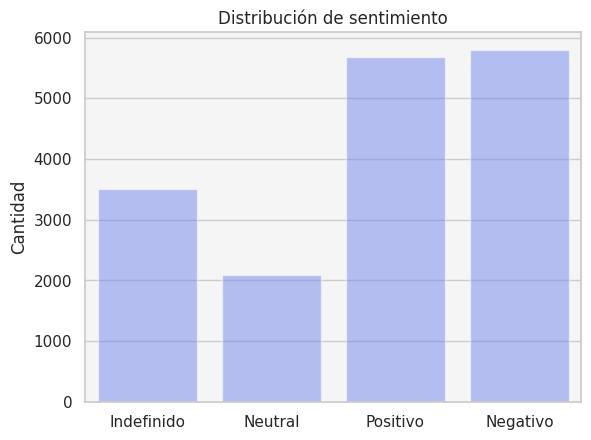

In [132]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.countplot(x='sentimiento', data=df_integrated, color='#5f78ff', alpha=0.5).set_title('Distribución de sentimiento')
plt.xlabel(None)
plt.ylabel('Cantidad')
plt.show()


In [102]:
def count_words(text):
    return len(text.split())

In [189]:
df_integrated['Cantidad palabras'] = df_integrated.texto.apply(lambda x:  count_words(x) if x else 0)
df_integrated

,id,texto,sentimiento,Cantidad palabras
0,142389495503925248,"Salgo de #VeoTV , que día más largoooooo...",Indefinido,8
1,142389933619945473,@PauladeLasHeras No te libraras de ayudar me/n...,Neutral,10
2,142391947707940864,@marodriguezb Gracias MAR,Positivo,3
3,142416095012339712,"Off pensando en el regalito Sinde, la que se v...",Negativo,24
4,142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ...,Positivo,15
...,...,...,...,...
17065,137523161032953856,"#rebélate @iunida @cayo_lara ""¿Dinero a los ba...",Negativo,26
17066,137523199150796800,". @cayo_lara: ""La prima de riesgo es la niña d...",Negativo,16
17067,137523450393788416,@cayo_lara Vuestra propuesta decreación de emp...,Positivo,22
17068,137523567108685824,"#rebelate @iunida cayo_lara: ""La prima de ries...",Negativo,16


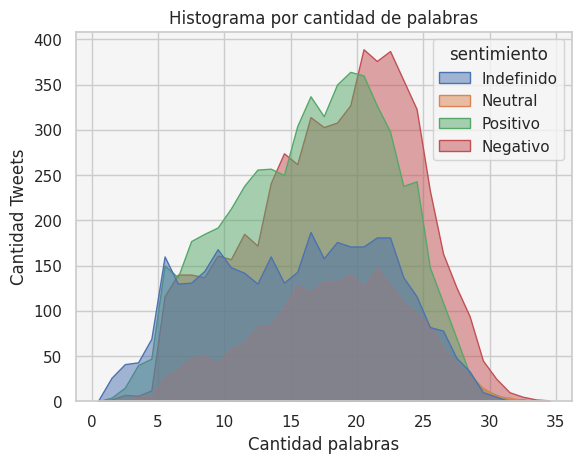

In [190]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.histplot(x='Cantidad palabras', data=df_integrated, color='#5f78ff', alpha=0.5, binrange=(0, 35),  bins=35, hue='sentimiento', element='poly').set_title('Histograma por cantidad de palabras')
plt.ylabel('Cantidad Tweets')
plt.show()

### Conclusiones:
- Se observan que los negativos tienden a tener mayor cantidad de palabras

In [191]:
def contar_caracteres_especiales(cadena):
    contador = 0
    for caracter in cadena:
        if not caracter.isalnum() and not caracter.isspace() and not caracter.isalpha() and caracter != '@' and caracter != '#' :
            contador += 1
    return contador

In [195]:
df_integrated['cant caracteres especiales'] = df_integrated.texto.apply(lambda x:  contar_caracteres_especiales(x) if x else 0)
df_integrated

,id,texto,sentimiento,Cantidad palabras,cant caracteres especiales,cant caracteres especiales
0,142389495503925248,"Salgo de #VeoTV , que día más largoooooo...",Indefinido,8,4,4
1,142389933619945473,@PauladeLasHeras No te libraras de ayudar me/n...,Neutral,10,2,2
2,142391947707940864,@marodriguezb Gracias MAR,Positivo,3,0,0
3,142416095012339712,"Off pensando en el regalito Sinde, la que se v...",Negativo,24,4,4
4,142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ...,Positivo,15,2,2
...,...,...,...,...,...,...
17065,137523161032953856,"#rebélate @iunida @cayo_lara ""¿Dinero a los ba...",Negativo,26,6,6
17066,137523199150796800,". @cayo_lara: ""La prima de riesgo es la niña d...",Negativo,16,12,12
17067,137523450393788416,@cayo_lara Vuestra propuesta decreación de emp...,Positivo,22,5,5
17068,137523567108685824,"#rebelate @iunida cayo_lara: ""La prima de ries...",Negativo,16,10,10


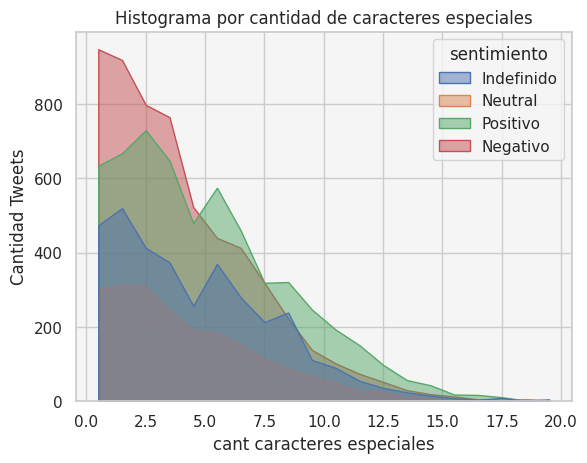

In [199]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.histplot(x='cant caracteres especiales', data=df_integrated, color='#5f78ff', alpha=0.5, binrange=(0, 20),  bins=20, hue='sentimiento', element='poly').set_title('Histograma por cantidad de caracteres especiales')
plt.ylabel('Cantidad Tweets')
plt.show()

In [201]:
def contar_caracter(caracter_especial, tweet):
    contador = 0
    for caracter in tweet:
        if caracter == caracter_especial :
            contador += 1
    return contador

In [203]:
df_integrated['cant menciones'] = df_integrated.texto.apply(lambda x:  contar_caracter('@', x) if x else 0)
df_integrated

,id,texto,sentimiento,Cantidad palabras,cant caracteres especiales,cant caracteres especiales,cant arrobas,cant menciones
0,142389495503925248,"Salgo de #VeoTV , que día más largoooooo...",Indefinido,8,4,4,0,0
1,142389933619945473,@PauladeLasHeras No te libraras de ayudar me/n...,Neutral,10,2,2,1,1
2,142391947707940864,@marodriguezb Gracias MAR,Positivo,3,0,0,1,1
3,142416095012339712,"Off pensando en el regalito Sinde, la que se v...",Negativo,24,4,4,0,0
4,142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ...,Positivo,15,2,2,0,0
...,...,...,...,...,...,...,...,...
17065,137523161032953856,"#rebélate @iunida @cayo_lara ""¿Dinero a los ba...",Negativo,26,6,6,2,2
17066,137523199150796800,". @cayo_lara: ""La prima de riesgo es la niña d...",Negativo,16,12,12,2,2
17067,137523450393788416,@cayo_lara Vuestra propuesta decreación de emp...,Positivo,22,5,5,1,1
17068,137523567108685824,"#rebelate @iunida cayo_lara: ""La prima de ries...",Negativo,16,10,10,1,1


In [204]:
df_integrated['cant hashtags'] = df_integrated.texto.apply(lambda x:  contar_caracter('#',x) if x else 0)
df_integrated

,id,texto,sentimiento,Cantidad palabras,cant caracteres especiales,cant caracteres especiales,cant arrobas,cant menciones,cant hashtags
0,142389495503925248,"Salgo de #VeoTV , que día más largoooooo...",Indefinido,8,4,4,0,0,1
1,142389933619945473,@PauladeLasHeras No te libraras de ayudar me/n...,Neutral,10,2,2,1,1,0
2,142391947707940864,@marodriguezb Gracias MAR,Positivo,3,0,0,1,1,0
3,142416095012339712,"Off pensando en el regalito Sinde, la que se v...",Negativo,24,4,4,0,0,0
4,142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ...,Positivo,15,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...
17065,137523161032953856,"#rebélate @iunida @cayo_lara ""¿Dinero a los ba...",Negativo,26,6,6,2,2,1
17066,137523199150796800,". @cayo_lara: ""La prima de riesgo es la niña d...",Negativo,16,12,12,2,2,0
17067,137523450393788416,@cayo_lara Vuestra propuesta decreación de emp...,Positivo,22,5,5,1,1,0
17068,137523567108685824,"#rebelate @iunida cayo_lara: ""La prima de ries...",Negativo,16,10,10,1,1,1


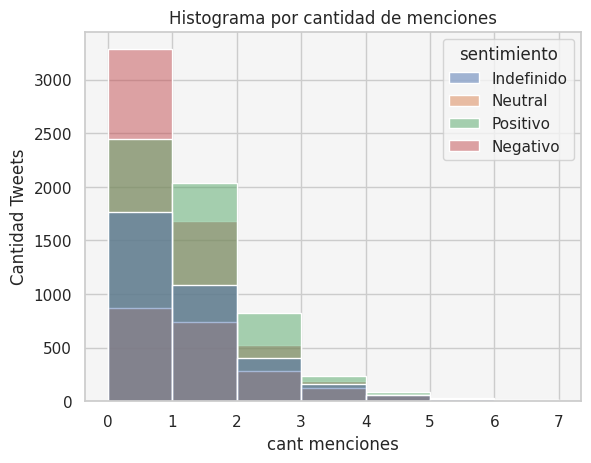

In [212]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.histplot(x='cant menciones', data=df_integrated, color='#5f78ff', alpha=0.5, binrange=(0, 7),  bins=7, hue='sentimiento').set_title('Histograma por cantidad de menciones')
plt.ylabel('Cantidad Tweets')
plt.show()

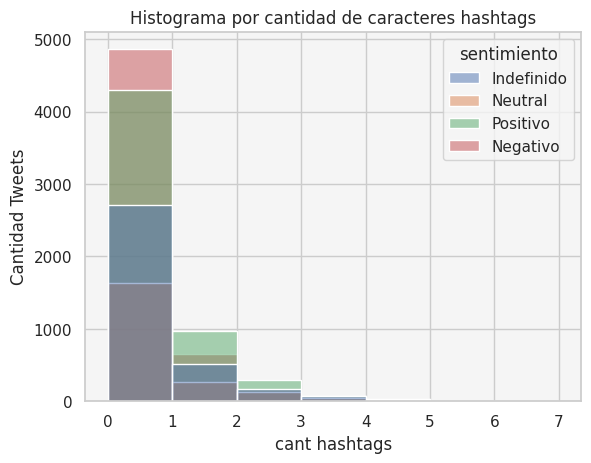

In [211]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})
ax = sns.histplot(x='cant hashtags', data=df_integrated, color='#5f78ff', alpha=0.5, binrange=(0, 7),  bins=7, hue='sentimiento').set_title('Histograma por cantidad de caracteres hashtags')
plt.ylabel('Cantidad Tweets')
plt.show()

In [224]:
df_integrated["texto"].apply(lambda x: x if x and 'RT' in x else None).value_counts()

texto
RT @FabHddzC: Si amas a alguien, déjalo libre. Si grita ese hombre es mío era @paurubio...                                                     1
RT: “@FelipeAlcarazM: Mañana, con la vigencia de la ley, nos comunicamos en interwert.”                                                        1
Desde el Consejo de RTVE me aclaran q lo de Clan y Teledeporte se ha sacado d madre.Era un ejemplo dq los recortes afectarán a la parrilla     1
Un besazo hasta Sevilla. RT @PAQUIKAVITO: @Jas_Sevilla @siempreesdnoche @alejandrosanz gracias salao!!! Besos pa Sevilla !!!                   1
Mucha suerte. Un besote RT @RaquelIglesi: @AlejandroSanz y ahora a repartir mmas curriculums y q mejor q ir ... http://t.co/laVKg6py           1
                                                                                                                                              ..
Me parece bochornoso hacer RTs de comentarios positivos...(pero es tan fácil caer en la tentación je je)                    

In [232]:
df_integrated.texto.apply(lambda x: 'RT @' in x if x else None).value_counts()

texto
False    16554
True       515
Name: count, dtype: int64

In [234]:
df_integrated['texto'].head(60)

0           Salgo de #VeoTV , que día más largoooooo...
1     @PauladeLasHeras No te libraras de ayudar me/n...
2                             @marodriguezb Gracias MAR
3     Off pensando en el regalito Sinde, la que se v...
4     Conozco a alguien q es adicto al drama! Ja ja ...
5     RT @FabHddzC: Si amas a alguien, déjalo libre....
6     Toca @crackoviadeTV3 . Grabación dl especial N...
7     Hoy asisitiré en Madrid a un seminario sobre l...
8     Buen día todos! Lo primero mandar un abrazo gr...
9     Desde el escaño. Todo listo para empezar #endi...
10    Bdías. EM no se ira de puente. Si vosotros os ...
11    Un sistema económico q recorta dinero para pre...
12                    #programascambiados caca d ajuste
13                                         Buen viernes
14    “@adri_22_22: #programascambiados es TT gracia...
15    Noooooos días! Me he dormidoooooo ya estoy en ...
16    Vamos a por el viernes (@ Ayuntamiento de Mála...
17    La Universidad confía en De la Calle para 